# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit_Learn library.

What we are going to cover:

0. An end-to-end Scikit-Leaern workflow
1. Getting the data ready
2. Choose the right estimator/ algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve the model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
import warnings
#warnings.filterwarnings("ignore") # this ignores all the warnings that appear
warnings.filterwarnings("default") # this is the default setting for the warnings module

In [3]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\chris\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 22.1.1
   setuptools: 68.2.2
        numpy: 1.21.5
        scipy: 1.10.1
       Cython: 3.0.6
       pandas: 1.4.4
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\chris\anaconda3\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 2
threading_layer: intel

       filepath: C:\Users\chris\anaconda3\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4


In [4]:
# Create x (Features Matrix)
# X == the feautures matrix all the columns apart from the target (age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal)

X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [5]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier # this is a classification learning model which classifies if an item is something or not
clf = RandomForestClassifier(n_estimators=100)

# We will keep the defaults settings on clf hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train);

In [8]:
# Make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [10]:
y_test

289    0
78     1
200    0
79     1
286    0
      ..
60     1
69     1
197    0
219    0
255    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.819672131147541

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[25,  7],
       [ 4, 25]], dtype=int64)

In [15]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [16]:
# 5. Improve the model
# Try different amount of estimators
np.random.seed(42)
for i in range(10,100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set:{clf.score(X_test, y_test) * 100:.2f} %")
    print("")

Trying model with 10 estimators...
Model accuracy on test set:85.25 %

Trying model with 20 estimators...
Model accuracy on test set:77.05 %

Trying model with 30 estimators...
Model accuracy on test set:80.33 %

Trying model with 40 estimators...
Model accuracy on test set:85.25 %

Trying model with 50 estimators...
Model accuracy on test set:77.05 %

Trying model with 60 estimators...
Model accuracy on test set:81.97 %

Trying model with 70 estimators...
Model accuracy on test set:80.33 %

Trying model with 80 estimators...
Model accuracy on test set:83.61 %

Trying model with 90 estimators...
Model accuracy on test set:83.61 %



In [17]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

C:\Users\chris\AppData\Local\Temp\ipykernel_141772\3364441119.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))


In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

C:\Users\chris\AppData\Local\Temp\ipykernel_141772\901759550.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))


0.8360655737704918

In [19]:
What_we_are_going_to_cover=[
"0. An end-to-end Scikit-Leaern workflow",
"1. Getting the data ready",
"2. Choose the right estimator/ algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating the model",
"5. Improve the model",
"6. Save and load a trained model",
"7. Putting it all together"
 ]

In [20]:
What_we_are_going_to_cover

['0. An end-to-end Scikit-Leaern workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/ algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Getting our data ready to be used with Machine learning
Three main things we have to do:
    1. Split the data into features and labels (Usually 'X', and 'y')
    2. Filling (aka Imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (aka Feature encoding)
    

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = heart_disease.drop("target", axis=1)
X.head() # note from above the target which is what we want to ask the ML model to predict is removed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Split the data into training and test sets from the principle that if we were in uni the teacher does not want to exposeyou to
# the answers of the exam before actually testing you on the exam, it refutes the whole logic of learning and finding out how much
# material you took in

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
X.shape # total number of rows in heart_disease csv == 303 and total number of columns is 14 - 1(being the target)

(303, 13)

In [28]:
X.shape[0] *0.8 # 80% of the heart_disease csv is 242

242.4

### 1.1 Make sure the data is all numerical

In [29]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [31]:
# the info above is split into cars with number of doors and the number of cars associated with them hence we will 
# identify them as categories
4    856
5     79
3     65
# Name: Doors, dtype: int64

SyntaxError: invalid syntax (1706375840.py, line 3)

In [32]:
len(car_sales )

1000

In [33]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [34]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [35]:
# Build Maching learning model
from sklearn.ensemble import RandomForestRegressor # this model predicts a number as opposed to classification

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_testy_test)

ValueError: could not convert string to float: 'Toyota'

In [36]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# find our categorical features
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features,)
                                 ],remainder ="passthrough") # accepts a list of tuples
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
# view the above in a dataframe
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
# the numbers above are directly represent the numbers below
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [39]:
# another version of onehotencoding
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies 

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [40]:
# Let's Fit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size= 0.2)

model.fit(X_train, y_train)


RandomForestRegressor()

In [41]:
model.score(X_test, y_test)

0.3235867221569877

In [42]:
print(sklearn.__version__)

1.3.0


### 1.2 What if there were missing values?

1.  Fill them with some value (also known as imputation).
2.  Remove the values with missing data altogether

In [43]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
# calculate number of missing data points in the csv file
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [46]:
# lets try and covert out datas to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# find our categorical features
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features,)
                                 ],remainder ="passthrough") # accepts a list of tuples
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [47]:
# Fill the "Make " column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer(KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [48]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [49]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)

In [50]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing)

950

In [52]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [53]:
# lets try and covert out datas to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# find our categorical features
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features,)
                                 ],remainder ="passthrough") # accepts a list of tuples
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [54]:
# check out these resources on scaling read it. on the to do list and refer to section 114 note correction for below
# https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310
# https://benalexkeen.com/feature-scaling-with-scikit-learn/
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

### Option 2: Fill missing values with Scikit-Learn

In [55]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [56]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [57]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
# Drop the row witn no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
# Split intzo X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [60]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value= "missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4 )
num_imputer = SimpleImputer(strategy="mean")


# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [61]:
car_sales_filled = pd.DataFrame(filled_X, columns =["Make","Colour","Doors","Odometer (KM)"] )

In [62]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [63]:
# lets try and covert out datas to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# find our categorical features
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features,)
                                 ],remainder ="passthrough") # accepts a list of tuples
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [64]:
# Now we have got our data as numbers and filled (no missing values)
# let us fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Initiate train test split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# initiate model
model = RandomForestRegressor()

# fit model
model.fit(X_train,y_train)

# score the model
model.score(X_test, y_test)

0.21990196728583944

In [65]:
# note that the prev model with more data points did slightly better than this so there for more data helps
len(car_sales_filled), len(car_sales)

(950, 1000)

In [66]:
What_we_are_going_to_cover

['0. An end-to-end Scikit-Leaern workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/ algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 2. Choosing the right estimator/algorithm for your problem

some things to note:

* Sklearn refers to machine learning models, algorithmy as estimators
* Classification problem - predicting a category (Heart disease or not)
    * Sometimes you'll se clf (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price for a house)

In [67]:
# check out sklearn machine learning model map in documentation
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Lets use the california housing dataset

In [3]:
# Get California Housing dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [5]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
housing_df["target"] = housing["target"]
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
# housing_df = housing_df.drop("MedHouseVal", axis=1)
new_housing_df = housing_df.copy()
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
# Import algorithm/ estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate and fit the model (on training set)
model = Ridge()
model.fit(X_train, y_train, )

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.5758549611440126

What if Ridge didnt work or the score didnt fit our needs?

Well we can always try a different model.

How about we try an ensemble model (an ensemble model is a combination of samller models to try and make better predictions than a single model)

Sklearn ensemble methods can be found here: https://scikit-learn.org/stable/auto_examples/ensemble/index.html#ensemble-methods

In [73]:
# Import the RandomForestRegressor Model class from the Ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setuo random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.8059837014172988

### 2.2 Chosingm an estimator for a classification problem

Lets go the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [74]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
# refering to the map do we have more than 50 samples in heart_disease csv == yes
# are we predicting a category Heart disease or not == yes
# do we have labelled data == yes
# do we have under 100k samples == yes
# following the map we end up at Linear SVC as an estimator to use

len(heart_disease)

303

In [76]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

# Check score of model on test set
model.score(X_test, y_test)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [77]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [78]:
# lets see if we can improve the model with RandomForestClassifier in the video the followed the map to this model

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check score of model on test set
model.score(X_test, y_test)

0.8524590163934426

The score for RandomForestClassifier was worse than SVC

Tidbit:
    1. if you have structure data, use ensemble methods
    2. if you have unstructured data use deep learning or tranfer learning

In [79]:
What_we_are_going_to_cover

['0. An end-to-end Scikit-Leaern workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/ algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.3 Fitting the model to the data

Different names for:
X = features, features variables, data
y = labels, targets, target variables

In [80]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
model.fit(X_train, y_train)

# Check score of model on test set (in this phase the model is using the patterns it has learned)
model.score(X_test, y_test)

0.8524590163934426

In [81]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [82]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
    * 1. predict()
    * 2. predict_proba()

In [83]:
# Use a trained model to make predictions
model.predict(np.array([1,7,8,3,4]))

C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [84]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [86]:
# our prediction is in the same format as our y_test data

In [87]:
# Compare predictions to truth labes to evaluate model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [88]:
# model.score(X_test, y_test) is identical to mean of y_preds
model.score(X_test, y_test)

0.8524590163934426

In [89]:
# another way to check if the test went well
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()


In [90]:
# predict_proba() returns probabilites of a classification label
# this is returning the probability of the label being True, compare above to below as the reference the same data point
# e,g first line [0.89, 0.11] == 0, second line [0.49, 0.51] == 1, meaning on first line possibility of heart disease is 89% false == 0
# and on second line 51% probablity of heart disease hence == 1 True

model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [91]:
# Let#s predict() on the same data...
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [92]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [93]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [94]:
# so from above
# age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal
# 179	57	1	0	150	276	0	0	112	1	0.6	1	1	1
# 228	59	1	3	170	288	0	0	159	0	0.2	1	0	3

# so using predict() and predict_proba()
# patient id 179 has a much higher probability of non-heart disease
# while patient 228 has a probability of heart disease

predict() can also be used for regression models 

In [95]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

X = housing_df.drop("target", axis= 1)
y = housing_df["target"]

# split into training test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor() # dont forget you can tune the model with n_estimators=<> 100 which is the default

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [97]:
y_preds[:10]

array([0.49909  , 0.74815  , 4.9334564, 2.56978  , 2.3469   , 1.6729601,
       2.30151  , 1.66775  , 2.52649  , 4.8600979])

In [98]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [99]:
# Compare lenght of y_predictions to the y_test, they are identical
len(y_preds), len(y_test)

(4128, 4128)

In [100]:
# Compare the predictions to the truth
# from the result of ttje mean_absolute_error on average the difference btw the y-test and y-pred is 0.32672061405038777
from sklearn.metrics import mean_absolute_error # check documentation on what this does

mean_absolute_error(y_test,y_preds)

0.32672061405038777

In [101]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4.0 Evaluating a machine learning model
read : https://scikit-learn.org/stable/modules/model_evaluation.html
Three ways to evaluate Scikit-Learn models/ estimators
    1. Estimators built in score ()
    2. Scoring parameter
    3. Problem specific metric function

### 4.1 Evaluating a model with the score method


In [102]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=100) # 100 is default, tweaking the estimators value can be used to tune the model, 5...100 or more

# Fit classifier to training data
model.fit(X_train, y_train)


RandomForestClassifier()

In [103]:
# the highest value for the .score() method is 1.0 the lowest is 0.0
# the reason for the score of 100% or 1.0 is because the model has seen the training data, so you would usually be scoring the test data
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test,y_test)

Let us use the score() on our regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create Regressor model instance
model = RandomForestRegressor(n_estimators=1000) # the more estimators you have the longer it will take to fit

# Fit classifier to training data
model.fit(X_train, y_train)


In [ ]:
# The default score() evaluation metric is r-squared algorithms
# Highest = 1.0, and lowest = 0.0
# score model
model.score(X_test,y_test) # n_estimators=2 0.47413793103448276

In [ ]:
# score model
model.score(X_test,y_test) # n_estimators=10 0.5503879310344828

In [ ]:
# score model
model.score(X_test,y_test) # n_estimators=50 0.5483896551724138

In [ ]:
# score model
model.score(X_test,y_test) # n_estimators=100 0.5106393318965518

In [ ]:
# score model
model.score(X_test,y_test) # n_estimators=1000 0.5314492715517243

### 4.2 Evaluating a model using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=100) # 100 is default, tweaking the estimators value can be used to tune the model, 5...100 or more

# Fit classifier to training data
model.fit(X_train, y_train);


In [ ]:
model.score(X_test, y_test)

In [ ]:
# the cross_val_score as default takes 5 different versions of the train_test_split to give a better representation of the true score of the model
# this can be tuned by using the cv parameter e.g cross_val_score(model, X, y, cv=10)

cross_val_score(model, X, y)

In [ ]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Take mean of 5-fold cross validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

# compare the 2 above

model_single_score, model_cross_val_score

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

In [ ]:
# Scoring parameter is set to None by default
cross_val_score(model, X, y, cv=5, scoring=None)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

** in this case we are doing Accuracy so no need to do train_test_split

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier()
cross_val_score_model = cross_val_score(model,X,y, cv=5)

In [ ]:
np.mean(cross_val_score_model)

In [ ]:
print(f"Heart Disease Classifier Cross Validated Accuracy: {np.mean(cross_val_score_model) *100:.2f}%")

** Area under the receiver operating characteristic curve** aka (AUC/ROC)
AUC
** Reciever Operating Characteristics **
ROC curve

ROC curves are a comparison of a models' true positive rate (tpr)
versus a models false positive rate (fpr)

* True posotive = model predits 1 when truth is 1
* False posistive = model predits 1 when truth is 0
* True negative = model predits 0 when truth is 0
* False negative = model predits 0 when truth is 1

In [ ]:
# Create X_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit classifier
model.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

y_probs[:10], len(y_probs) # [0.92, 0.08] == 0.92 is the negative class and 0.08 is the positive class

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr) ")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

# Run function    
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

In [ ]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# Perfect AUC score

roc_auc_score(y_test, y_test)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual label it was supposed to predict.

In essence, giving you an idea  of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

In [ ]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

In [ ]:
29+0+1+31

In [ ]:
len(y_preds)

In [ ]:
# Make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot ot using Seaborn
sns.heatmap(conf_mat);

In [ ]:
# How to install an package in jupyter notebook into the current environment
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual lables is it was supposed to 
predict.

In essence, this gives you an idea of where the model is getting confused
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

In [ ]:
pd.crosstab(y_test, y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"])

### Creating a confusion matrix using Scikit-learn

To use the new methods of creating a confusion matrix with Scikit_Learn you will need sklearn version 1.0 +

In [ ]:
# how to check the latest version of sklearn 
sklearn.__version__

In [ ]:
# how to install latest version of scikit learn
# deactivate the environment
# move to dir to env but dont enter
# activate environment
# use pip install -U scikit-learn 
# above code will upgrade to latest version of scikit-learn

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [ ]:
# Where precision and recall become valuable 

# creating an array or 10000 people where 1 of them has a disease
disease_true = np.zeros(10000) 

# 1 of them has a disease in the 10000
disease_true[0]= 1

# model predicts every case as 0
disease_preds = np.zeros(10000) 

# Create a data frame to capture this info
pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

There are other tools you can use to do evaluations of a classification of models apart from confusion mátrix etc
see link below
https://scikit-learn.org/stable/modules/model_evaluation.html

To summarize classification metrics:
        * Accuracy is a good measure to start with if all the classes are balanced(e.g same amount of samples which are labelled with 0 or 1).
        * Precision and recall become more important when classes are imbalanced.
        * if false positive predictions are worse than false negatives, aim for higher precision.
        * if false negatives are worse than false positives, aim for higher recall.
        * F1-score is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

read this
Model evaluaton metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we are going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error(MSE)

In [10]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train,y_train)

KeyError: "['target'] not found in axis"

In [ ]:
model.score(X_test,y_test)

In [9]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y_test

In [ ]:
y_test.mean()

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean()) # what does np.full do?? fill an array with the lenght of y_test with the mean value of y_test

In [ ]:
y_test_mean[:10]

In [ ]:
# How would we use the r-2 function?
r2_score(y_true=y_test,
         y_pred=y_test_mean)

In [ ]:
r2_score(y_true=y_test,
         y_pred=y_test)

**R^2**

What R-squared does: Compares you models predictions to the mean of the targets. Values can range from negative infinty(a very poor model)
    to 1, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model pefectly predicts a range of
    numbers its R^2 value would be 1.

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

it gives you an idea of how wrong your models predictions are.

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

In [ ]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

In [ ]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [163]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542406995878388

In [165]:
df["squared_differences"] = np.square(df["differences"] )
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,0.000488
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [166]:
# Calculate MSE by Hand
squared = np.square(df["differences"] )
squared.mean()

0.2542406995878385

In [170]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [171]:
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,16.000000
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576
...,...,...,...,...
15362,2.63300,2.209870,-0.423130,0.179039
16623,2.66800,1.938190,-0.729810,0.532623
18086,5.00001,4.835158,-0.164852,0.027176
2144,0.72300,0.717780,-0.005220,0.000027


In [173]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2581165503707599

In [174]:
df_large_error.iloc[1:100]= 20

In [175]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.7342466472912572

check out these resources 
https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

https://stackoverflow.com/a/37861832    

### 4.2.3 Finally using the 'scoring' parameter

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier(n_estimators=100)

In [179]:
np.random.seed(42)

# Cross-validation accuracy

cv_acc = cross_val_score(model, X,y, cv=5, scoring=None) #if scoring= None estimators default evaluation metric is used
# which is (accuracy for classification models)
cv_acc 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [181]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)* 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [182]:
np.random.seed(42)

cv_acc  = cv_acc = cross_val_score(model, X,y, cv=5, scoring="accuracy")
cv_acc 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [183]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)* 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [189]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(model, X,y, cv=5, scoring="precision")
cv_precision 

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [188]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)* 100:.2f}%")

The cross-validated precision is: 83.30%


In [187]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(model, X,y, cv=5, scoring="recall")
cv_acc 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [190]:
# Cross-validated recall
print(f"The cross-validated precision is: {np.mean(cv_recall)* 100:.2f}%")

The cross-validated precision is: 85.45%


Lets see the `scoring` parameter being used for a regression problem

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
housing_df["target"] = housing["target"]

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [17]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.653726846238643

In [22]:
cv_r2

array([0.6202544 , 0.72010179, 0.62082435])

In [23]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4303257834045092

In [24]:
cv_mse

array([-0.52497181, -0.34807246, -0.37397628, -0.44122708, -0.46338128])

In [25]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4664908631250001

In [26]:
cv_mae

array([-0.54332557, -0.4101009 , -0.43840433, -0.46642457, -0.47419896])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create X, y

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model
model = RandomForestClassifier()

# Fit Model
model.fit(X_train,y_train)

# Make predictions
y_pred=model.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_pred) *100:.2f} %")
print(f"Precision: {precision_score(y_test,y_pred) }")
print(f"Recall Score: {recall_score(y_test,y_pred) }")
print(f"F1 Score: {f1_score(y_test,y_pred) }")


Classifier metrics on the test set
Accuracy: 85.25 %
Precision: 0.8484848484848485
Recall Score: 0.875
F1 Score: 0.8615384615384615


In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create X, y

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model
model = RandomForestRegressor()

# Fit Model
model.fit(X_train,y_train)

# Make predictions
y_preds=model.predict(X_test)



# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)} ")
print(f"MAE: {mean_absolute_error(y_test, y_preds)} ")
print(f"MSE: {mean_squared_error(y_test, y_preds)} ")

Regression metrics on the test set
R2 score: 0.8059837014172988 
MAE: 0.32672061405038777 
MSE: 0.2542406995878388 


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more the data the better)
* Could we improve our data? 

From a model perspective:
* is there a better model we could use?
* Could we improve the current model? 

HyperParameters vs Parameters
Parameters = Models find these patterns in data
HyperParameters = settings on a model you can adjust to potentially improve its ability to find patterns

Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

see : https://scikit-learn.org/stable/modules/grid_search.html

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [43]:
model.get_params() # How to list baseline parameters in a model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by Hand

Lets make 3 sets, training, validation and test

We are going to try and adjust:
    * `max_depth`
    * `max_features`
    * `min_samples_leaf`
    * `min_samples_split`
    * `n_estimators`

In [122]:
# Create an evaluation function
def evaluate_preds(y_true, y_preds):
    """
    Performs Evaluation Comparison on y_true labels vs y_preds labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2),
                  }
    print(f"Accuracy: {accuracy * 100:.2f} %")
    print(f"Precision: {precision:.2f} ")
    print(f"Recall: {recall:.2f} ")
    print(f"F1: {f1:.2f} ")
    return metric_dict

In [123]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split=round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split= round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split],y[:train_split] # i dont get this part
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train),len(X_valid),len(X_test)

model = RandomForestClassifier()
model.fit(X_train,y_train)

# Make baseline Predictions
y_preds = model.predict(X_valid) # in tuning the hyperparamters we will tune the model on the
# validation split instead of the test split

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy: 82.22 %
Precision: 0.81 
Recall: 0.88 
F1: 0.85 


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [124]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [127]:
np.random.seed(42)

# Create a second classifier with different Hyperparameters
model_2 = RandomForestClassifier(100)
model_2.fit(X_train,y_train)

# Make second predictions
y_preds_2 = model_2.predict(X_valid)

# Evaluate the classifier on validation set
model_2_metrics = evaluate_preds(y_valid,y_preds)
model_2_metrics

Accuracy: 82.22 %
Precision: 0.81 
Recall: 0.88 
F1: 0.85 


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [ ]:
model_3 = RandomForestClassifier(n_estimators=100,
                                 max_depth=10) # Note trying to adjust max_features * min_samples_leaf * min_samples_split * n_estimators
                                                # can be overwhelming, hence use RCV == RandomSearchCV

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [129]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
        
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test set
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
                                                   
# Instatiate Randomforestclassifier
model = RandomForestClassifier(n_jobs=1)                                                  
                                                   
# setup RandomizedSearchCV # the CV part is cross validation
rs_model = RandomizedSearchCV(estimator = model,
                           param_distributions = grid,
                           n_iter=10,#number of models to try
                           cv=5,
                           verbose=2)   

                                                   
# Fit the RandomizedSearchCV version of model
rs_model.fit(X_train, y_train);                                                   


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\chris\anaconda3\lib\site-packages\

In [130]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [131]:
# make predictions with the best hyperparameters
rs_y_preds = rs_model.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97 %
Precision: 0.77 
Recall: 0.86 
F1: 0.81 


### 5.3 Hyperparameter tuning with GridSearchCV

In [71]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [132]:
"""
grid
{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}
 6*5*2*3*3 * 5 from cv=5 cross validation split to 3*1*2*1*2 * 5 from cv=5 in setup RandomizedSearchCV
From rs_model.best_params_ we found these values to be the optimum, so utilizing grid search
we will tailor the grid_2 with the below values in mind to optimize the search as gridsearchcv is more
expansive and we would like to minimize the computing power usage by reducing our search space of 
hyperparameters.

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}
 
"""
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [74]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test set
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
                                                   
# Instatiate Randomforestclassifier
model = RandomForestClassifier(n_jobs=1)                                                  
                                                   
# setup GridSearchCV 
gs_model = GridSearchCV(estimator = model,
                           param_grid = grid_2,
                           cv=5,
                           verbose=2)   

                                                   
# Fit the GridSearchCV version of model
gs_model.fit(X_train, y_train); 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\chris\anaconda3\lib\site-packages\

In [133]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [134]:
# make predictions with the best hyperparameters
gs_y_preds = gs_model.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.97 %
Precision: 0.77 
Recall: 0.86 
F1: 0.81 


Let's compare our different models metrics

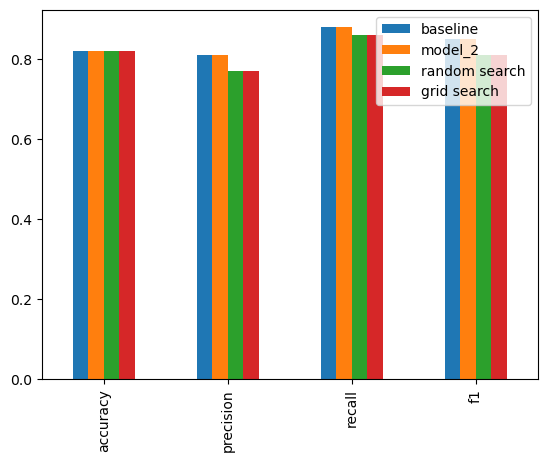

In [135]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "model_2": model_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot(kind='bar');

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With the python `pickle` module
2. With the `joblib`module

**Pickle**

In [137]:
import pickle

# Save an existing model to file
pickle.dump(gs_model, open("gs_random_forest_model_1.pk1", "wb"))

In [138]:
# load a saved model

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1","rb"))

In [139]:
# To check if the loaded model works
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, y_prickle_y_preds)


NameError: name 'y_prickle_y_preds' is not defined

**joblib**
see https://joblib.readthedocs.io/en/stable/

In [142]:
from joblib import dump, load

# Save model to file
dump(gs_model, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [143]:
# Import a saved joblib module
loaded_job_model = load(filename="gs_random_forest_model_1.joblib" )

In [144]:
# Make and evaluate joblib predictions

joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Accuracy: 81.97 %
Precision: 0.77 
Recall: 0.86 
F1: 0.81 


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [ ]:
# in which case is better for joblib and pickle?

### 7. Putting it all together


what is the relevance of scikit-learns pipeline module with regards to machine learning?
Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.
Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [146]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [147]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [148]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    1. Fill missing data
    2. Convert data to numbers
    3. Build a model on the data

In [11]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))                                         
])

door_feature =["Doors"]
door_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numerical_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean'))  
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                transformers=[
                    ('categorical', categorical_transformer,  categorical_features),
                    ('door', door_transformer, door_feature),
                    ('numerical', numeric_transformer, numerical_features)
                ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), # this will fill our missing data and make sure it's all numbers
                        ('model', RandomForestRegressor())]) # this will model our data

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit & Score the model
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.22188417408787875

It is also possible to use `GridSearchcv`or `RandomizedSearchCV`with our `Pipeline`

In [14]:
# Use Gridsearchcv with our regression pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__numerical__imputer__strategy":["mean","median"], 
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_f

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   4.8s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__numerical__imputer__strategy': ['mean',
                                                                        'median']},
             verbose=2)

In [15]:
gs_model.score(X_test, y_test)

0.2848784564026805